<a href="https://colab.research.google.com/github/kimdesok/Introduction-to-TensorFlow-for-Artificial-Intelligence-Machine-Learning-and-Deep-Learning-Coursera/blob/master/C2/C2_W2_Lab_1_cats_v_dogs_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Download the dataset
!wget 'https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip'

--2022-06-04 06:06:16--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   112MB/s    in 0.6s    

2022-06-04 06:06:16 (112 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

zip_ref=zipfile.ZipFile('./cats_and_dogs_filtered.zip')
zip_ref.extractall('tmp/')
zip_ref.close()

base_dir='./tmp/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir, 'train')
validation_dir=os.path.join(base_dir,'validation')
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')




In [64]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


def create_model():

  model = tf.keras.models.Sequential([
    
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  return model

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255 )

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150,150), batch_size=20, class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [66]:
# Constant for epochs
EPOCHS = 50

# Create a new model
model = create_model()

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/50
100/100 - 9s - loss: 0.6882 - accuracy: 0.5490 - val_loss: 0.6391 - val_accuracy: 0.6240 - 9s/epoch - 93ms/step
Epoch 2/50
100/100 - 8s - loss: 0.6232 - accuracy: 0.6585 - val_loss: 0.5839 - val_accuracy: 0.6970 - 8s/epoch - 85ms/step
Epoch 3/50
100/100 - 8s - loss: 0.5637 - accuracy: 0.7175 - val_loss: 0.5618 - val_accuracy: 0.7070 - 8s/epoch - 84ms/step
Epoch 4/50
100/100 - 10s - loss: 0.5201 - accuracy: 0.7445 - val_loss: 0.5639 - val_accuracy: 0.7120 - 10s/epoch - 98ms/step
Epoch 5/50
100/100 - 9s - loss: 0.4820 - accuracy: 0.7730 - val_loss: 0.5405 - val_accuracy: 0.7180 - 9s/epoch - 85ms/step
Epoch 6/50
100/100 - 8s - loss: 0.4514 - accuracy: 0.7835 - val_loss: 0.5478 - val_accuracy: 0.7230 - 8s/epoch - 84ms/step
Epoch 7/50
100/100 - 9s - loss: 0.4186 - accuracy: 0.8115 - val_loss: 0.5625 - val_accuracy: 0.7110 - 9s/epoch - 86ms/step
Epoch 8/50
100/100 - 8s - loss: 0.3764 - accuracy: 0.8390 - val_loss: 0.5736 - val_accuracy: 0.7140 - 8s/epoch - 85ms/step
Epoch 9/50
100

[0.5490000247955322, 0.6585000157356262, 0.7174999713897705, 0.7444999814033508, 0.7730000019073486, 0.7835000157356262, 0.8115000128746033, 0.8389999866485596, 0.8495000004768372, 0.8654999732971191, 0.8849999904632568, 0.9035000205039978, 0.909500002861023, 0.9294999837875366, 0.9434999823570251, 0.9514999985694885, 0.9605000019073486, 0.972000002861023, 0.9754999876022339, 0.9789999723434448, 0.9810000061988831, 0.9925000071525574, 0.9929999709129333, 0.9904999732971191, 0.9955000281333923, 0.9940000176429749, 0.9944999814033508, 0.9950000047683716, 0.9950000047683716, 0.9950000047683716, 0.9975000023841858, 0.9965000152587891, 0.9984999895095825, 0.9950000047683716, 0.9919999837875366, 0.9990000128746033, 0.9959999918937683, 0.996999979019165, 0.9984999895095825, 0.996999979019165, 0.9980000257492065, 0.9984999895095825, 0.9975000023841858, 0.9975000023841858, 0.996999979019165, 0.9975000023841858, 0.996999979019165, 0.9984999895095825, 1.0, 0.9959999918937683]
[0.6240000128746033,

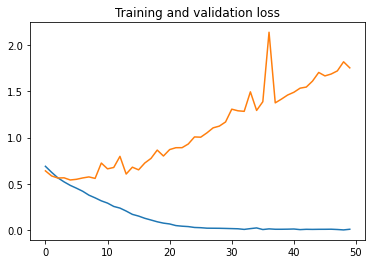

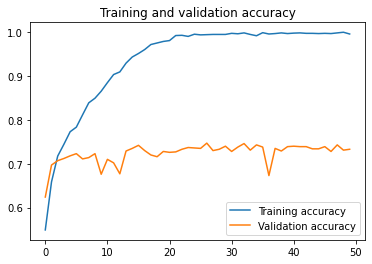

In [70]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))
  print(epochs)

  plt.plot(epochs, loss, label='Training Loss')
  plt.plot(epochs, val_loss, label='Validation Loss')
  plt.title('Training and validation loss')

  plt.figure()

  plt.plot(epochs, acc, label='Training accuracy')
  plt.plot(epochs, val_acc, label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.show()

# Plot training results
print(history.history['accuracy'])
print(history.history['val_accuracy'])

plot_loss_acc(history)

In [71]:
model_for_aug = create_model()
 #data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [72]:
# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/50
100/100 - 18s - loss: 0.6969 - accuracy: 0.5405 - val_loss: 0.6625 - val_accuracy: 0.5820 - 18s/epoch - 182ms/step
Epoch 2/50
100/100 - 17s - loss: 0.6670 - accuracy: 0.5855 - val_loss: 0.6183 - val_accuracy: 0.6640 - 17s/epoch - 169ms/step
Epoch 3/50
100/100 - 17s - loss: 0.6397 - accuracy: 0.6315 - val_loss: 0.5875 - val_accuracy: 0.6800 - 17s/epoch - 168ms/step
Epoch 4/50
100/100 - 17s - loss: 0.6129 - accuracy: 0.6620 - val_loss: 0.6074 - val_accuracy: 0.6410 - 17s/epoch - 167ms/step
Epoch 5/50
100/100 - 17s - loss: 0.6079 - accuracy: 0.6540 - val_loss: 0.5837 - val_accuracy: 0.6760 - 17s/epoch - 169ms/step
Epoch 6/50
100/100 - 17s - loss: 0.6029 - accuracy: 0.6565 - val_loss: 0.5567 - val_accuracy: 0.7050 - 17s/epoch - 168ms/step
Epoch 7/50
100/100 - 17s - loss: 0.5954 - accuracy: 0.6700 - val_loss: 0.5531 - val_accuracy: 0.7070 - 17s/epoch - 171ms/step
Epoch 8/50
100/100 - 17s - loss: 0.5849 - accuracy: 0.6885 - val_loss: 0.5576 - val_accuracy: 0.7090 - 17s/epoch - 170

range(0, 50)


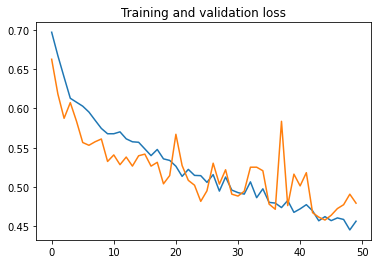

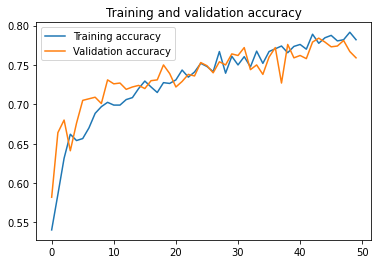

In [73]:
plot_loss_acc(history_with_aug)